In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 29 14:12:29 2021

@author: MON
# | Title         | Test af tilgange til evaluering af konvergens i ProcesOptimizer   |
# |---------------|---------------------------------------------|
# | Assignment    | Boost Væksten projektet                     |
# | Author        | MON                                         |
# | QA            |                                             |
# | Creation date | 29/09/2021                                  |
# | Environment   | BoostV_20210929                             |
# | Purpose       | Udvikling af konvergensplot til Brownie Bee |
"""
#%% Importer relevante pakker

import matplotlib.pyplot as plt
import numpy as np
import os
from ProcessOptimizer import Optimizer
from ProcessOptimizer.utils import expected_minimum, y_coverage
from ProcessOptimizer.plots import dependence, plot_expected_minimum_convergence
%load_ext autoreload
%autoreload 2
#%pylab nbagg

#%% Øvrige metoder
# Vores "target" er at skyde 574 cm, og vores score er derfor den absolutte 
# afstand til denne længde
target = 329
def score(target,result):
    return abs(target-result)
# Metode til at finde hvor meget af y-aksen vi bruger
def y_mag(res,x_loc):
    y_mag = np.zeros(len(x_loc))
    for i in range(len(x_loc)):
        y = dependence(res.space,res.models[-1],i,x_eval=x_loc)
        y = np.array(y[1])
        y_mag[i] = y.max() - y.min()
    return y_mag

#%% Byg vores optimizer

# Først defineres vores parameterrum til optimering af en virtuel katapult som
# kan findes på hjemmesiden sigmazone.com/catapult. Grænserne repræsenterer den
# højre elastik, venstre elastik, kop-højde og pin-vinkel. Der skydes altid med
# den maksimalt mulige kraft (pullback)
space = [(100.0,200.0), (100.0,200.0), (200.0,300.0), (90.0,140.0)]
# Vi definerer antal indledende punkter til 5
n_init = 5
random_state = 42

# Byg optimizer objektet, med Xi = 50
opt = Optimizer(space,n_initial_points=n_init,acq_func_kwargs={'xi': 50}, random_state=random_state)

# Bed om de første fem punkter
next_x = opt.ask(5)
# Outputtet er:
 #[[130.0, 170.0, 210.0, 105.0],
 # [190.0, 150.0, 250.0, 135.0],
 # [150.0, 130.0, 230.0,  95.0],
 # [110.0, 110.0, 270.0, 115.0],
 # [170.0, 190.0, 290.0, 125.0]]
 
# Fortæl resultatet af disse fem indstillinger til optimizeren
res = opt.tell(next_x[0],score(target,216))
print('length of result ', len(res.x_iters))
res = opt.tell(next_x[1],score(target,320))
print('length of result ', len(res.x_iters))
res = opt.tell(next_x[2],score(target,182))
print('length of result ', len(res.x_iters))
res = opt.tell(next_x[3],score(target,211))
print('length of result ', len(res.x_iters))
res = opt.tell(next_x[4],score(target,491))
print('length of result ', len(res.x_iters))

# Forbered lister til at gemme positionen af det forventede minimum, dets værdi
# og usikkerhed, samt hvor meget af y-aksen vi "bruger" langs hver dimension
# når vi kigger langs hver faktor ved det forventede minimum
em_loc = []
em_val = []
y_span = []

# Beregn expected minimum og dennes usikkerhed
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
# Gem position og værdi/usikkerhed af expected minimum
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 6
next_x = opt.ask(1) # [191.0, 149.0, 251.0, 131.0]
# Hard-code next_x for reproducibilitet
next_x = [191.0, 149.0, 251.0, 131.0]

# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,341))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 7
next_x = opt.ask(1) # [199.0, 161.0, 241.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [199.0, 161.0, 241.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,264))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 8
next_x = opt.ask(1) # [138.0, 150.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [138.0, 150.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,233))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 9
next_x = opt.ask(1) # [182.0, 149.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [182.0, 149.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,326))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 10
next_x = opt.ask(1) # [199.0, 143.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [199.0, 143.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,345))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 11
next_x = opt.ask(1) # [181.0, 142.0, 256.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [181.0, 142.0, 256.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,240))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 12
next_x = opt.ask(1) # [200.0, 152.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [200.0, 152.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,358))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 13
next_x = opt.ask(1) # [181.0, 154.0, 300.0, 106.0]
# Hard-code next_x for reproducibilitet
next_x = [181.0, 154.0, 300.0, 106.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,438))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

### HERTIL

#%% Skud nummer 14
next_x = opt.ask(1) # [166.0, 200.0, 300.0, 116.0]
# Hard-code next_x for reproducibilitet
next_x = [166.0, 200.0, 300.0, 116.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,538))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 15
next_x = opt.ask(1) # [100.0, 200.0, 300.0, 90.0]
# Hard-code next_x for reproducibilitet
next_x = [100.0, 200.0, 300.0, 90.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,207))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 16
next_x = opt.ask(1) # [181.0, 200.0, 300.0, 119.0]
# Hard-code next_x for reproducibilitet
next_x = [181.0, 200.0, 300.0, 119.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,583))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 17
next_x = opt.ask(1) # [179.0, 200.0, 300.0, 116.0]
# Hard-code next_x for reproducibilitet
next_x = [179.0, 200.0, 300.0, 116.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,569))
print('length of result ', len(res.x_iters))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True, random_state=random_state)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]


length of result  1
length of result  2
length of result  3
length of result  4
length of result  5
length of result  6
length of result  7
length of result  8
length of result  9
length of result  10
length of result  11
length of result  12
length of result  13
length of result  14
length of result  15
length of result  16
length of result  17


length of result  17
length of em_loc  13
length of em_loc_norm  13


(0.0, 2.5)

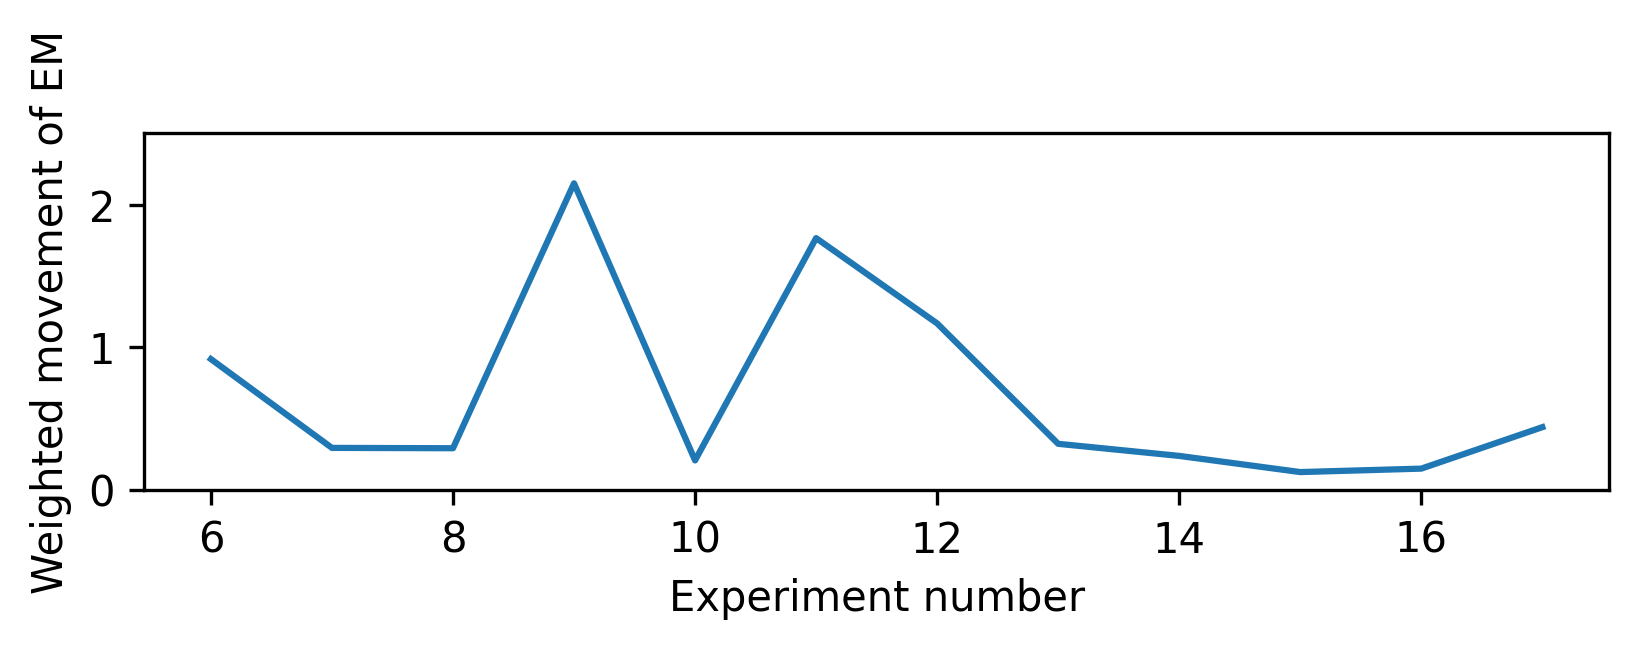

In [2]:

#%% Plot af bevægelse af expected minimum
print('length of result ', len(res.x_iters))
# Vi kan nu beregne en vægtet metrik for hvor meget minimum har flyttet sig, 
print('length of em_loc ', len(em_loc))
# Vi starter med at normalisere positionen af vores expected minimum langs vores akser
em_loc_norm = opt.space.transform(em_loc)
print('length of em_loc_norm ', len(em_loc_norm))
# Beregn nu ændringen langs hver akse for hvert skridt
diff = np.diff(em_loc_norm,axis=0)
# Lav en vægtet sum af de kvadrerede ændringer, med den nyeste y_span som vægte
em_change_sum = np.sum(np.square(diff)*y_span[-1],axis=1)
# Beregn bevægelsen ved at tage kvadratroden af den vægtede sum
em_change = np.sqrt(em_change_sum)

fig = plt.figure(figsize = (16/2.54, 4/2.54),dpi=300)
ax = plt.axes()
ax.plot(range(n_init+1,len(em_change)+n_init+1),em_change)
ax.set_xlabel("Experiment number")
ax.set_ylabel("Weighted movement of EM")
ax.set_ylim(0,2.5)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
length of result  17
length of estimated_mins_x  17
[[189.7103744759065, 150.73216133915827, 248.88970481264735, 139.20968597564627], [191.08172294759066, 150.14664099149573, 251.55045176575436, 139.91145345478452], [188.72959862611674, 150.1220767646358, 249.95477543477102, 139.4321353480532], [185.17120244441801, 149.16893684209228, 279.6270949188523, 140.0], [186.7964111417021, 148.48616975913865, 280.3875502538576, 140.0], [196.6430999278613, 149.6175042014753, 300.0, 138.98506181417], [185.89822829040162, 150.26330329695458, 297.40158202976056, 138.50383070256214], [186.9508520558896, 149.6557004469555, 300.0, 139.54555054405262], [187.69834679516975, 149.2650468718756, 296.9554968143459, 139.6962837746067], [188.07168102398327, 149.04242327216662, 295.792748958525, 139.32133460961657], [188.77970076171266, 148.780038612017, 294.1336071055058, 139.13323594119913], [189.50740786992824, 148.36542

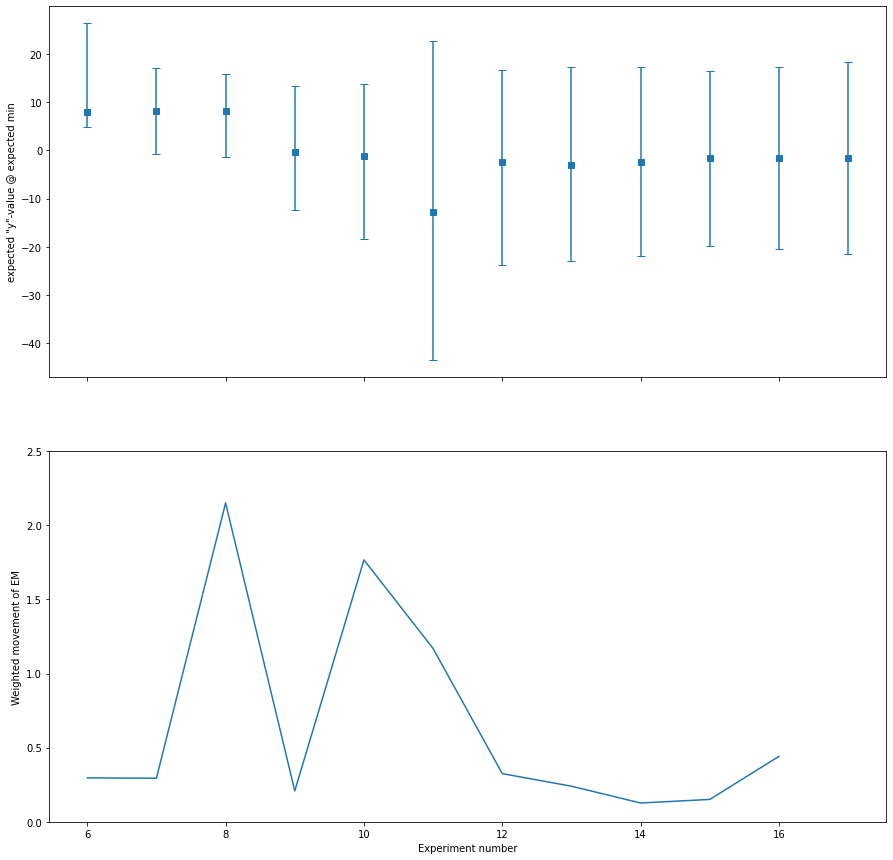

In [4]:
%load_ext autoreload
%autoreload 2

_ = plot_expected_minimum_convergence(res,5,random_state=random_state)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10


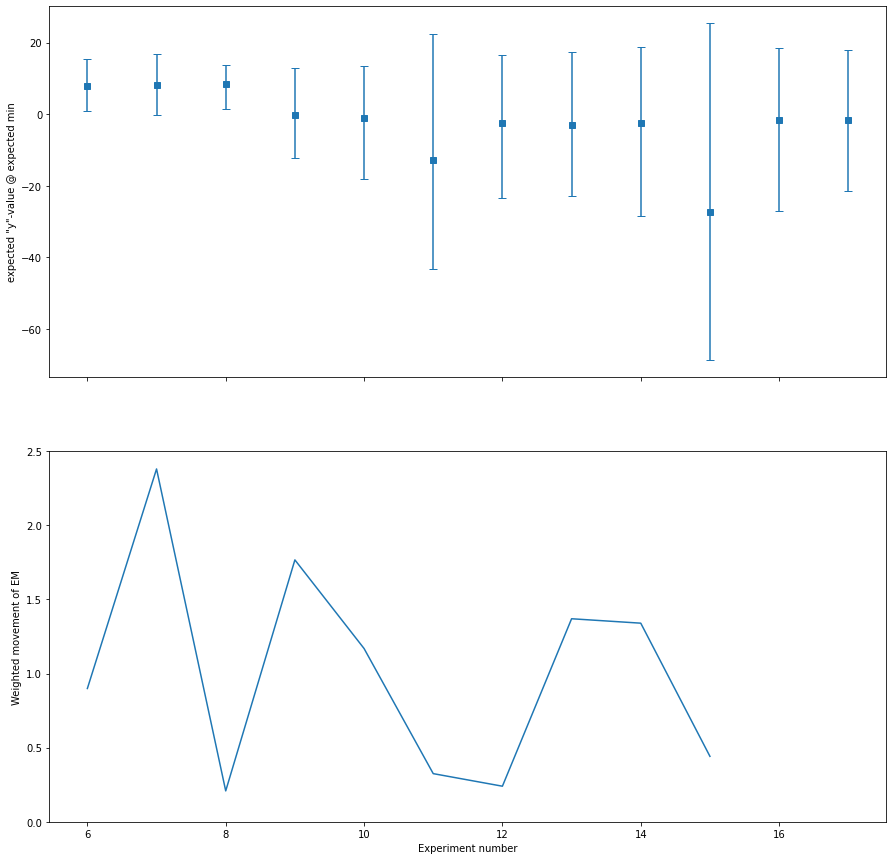

In [5]:
%load_ext autoreload
%autoreload 2

_ = plot_expected_minimum_convergence(res,5)